In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import datasets 

from sklearn.model_selection import train_test_split

In [3]:
wine = datasets.load_wine()

In [6]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [8]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [10]:
wine.target_names


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [15]:
x = wine.data
y = wine.target
x.shape, y.shape

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [22]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = .33, stratify = y,random_state = 42)

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [29]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.6949152542372882

In [31]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.711864406779661

In [32]:
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.7288135593220338

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [37]:
x_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [39]:
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = .33, stratify = y,random_state = 42)
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9491525423728814

In [40]:
############# K-Fold ################

from sklearn.model_selection import cross_val_score

In [45]:
neighbors = list(range(1,50,2))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn,x_scaled,y,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())

In [46]:
cv_scores

[0.9434640522875817,
 0.9545751633986927,
 0.9604575163398692,
 0.9663398692810456,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9663398692810456,
 0.9722222222222221,
 0.9722222222222221,
 0.9722222222222221,
 0.9833333333333334,
 0.9718954248366012,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9777777777777779,
 0.9777777777777779,
 0.9722222222222221,
 0.9722222222222221,
 0.9663398692810456,
 0.9663398692810456,
 0.9604575163398692,
 0.9604575163398692,
 0.9604575163398692]

In [47]:
MSE = [1 - x for x in cv_scores]
MSE

[0.05653594771241832,
 0.04542483660130725,
 0.0395424836601308,
 0.03366013071895435,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.03366013071895435,
 0.0277777777777779,
 0.0277777777777779,
 0.0277777777777779,
 0.016666666666666607,
 0.028104575163398815,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.022222222222222143,
 0.022222222222222143,
 0.0277777777777779,
 0.0277777777777779,
 0.03366013071895435,
 0.03366013071895435,
 0.0395424836601308,
 0.0395424836601308,
 0.0395424836601308]

In [53]:
op_k = neighbors[MSE.index(min(MSE))]

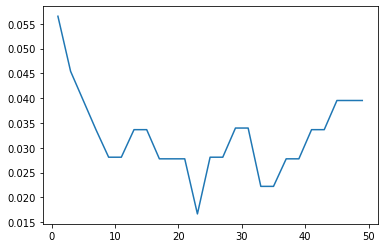

In [54]:
plt.plot(neighbors,MSE)
plt.show()

In [55]:
knn = KNeighborsClassifier(n_neighbors = op_k)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
metrics.accuracy_score(y_test,y_predict)

0.9830508474576272